In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
import h5py
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 

In [2]:
import numpy as np
import pandas as pd
import os
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree
from xgboost import plot_importance
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
import preprocessing
from tqdm import tqdm
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from skimage.transform import resize
from collections import Counter
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # Inception
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import xgboost as xgb
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
w , h= 256,256 # tested with 16 , 32 , 64 , 128 pixel values
final_class = 5
w,h,final_class

(256, 256, 5)

In [4]:
def FormatDataset(dataset_src, dataset_dest, classes):
    # Making a Copy of Dataset
    new_cropped_dest = [os.path.join(dataset_dest, cls, 'CROPPED') for cls in classes];
    new_complete_dest = [os.path.join(dataset_dest, cls, 'COMPLETE') for cls in classes];
    cropped_src = [ dataset_src + "/im_" + cls + "/im_" + cls + "/CROPPED" for cls in classes ];
    complete_src = [ dataset_src + "/im_" + cls + "/im_" + cls for cls in classes ];
    for (dest1, dest2) in zip(new_cropped_dest, new_complete_dest):
        os.makedirs(dest1);
        os.makedirs(dest2);
    # Formating Cropped Images
    for (src,new_dest) in zip(cropped_src, new_cropped_dest):
        for file in os.listdir(src):
            filename, file_ext = os.path.splitext(file);
            if file_ext == '.bmp':
                img_des = os.path.join(new_dest, filename + '.jpg');
                img = cv2.imread(os.path.join(src, file));
                img = cv2.resize(img, (w, h));
                img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0);
                img = cv2.blur(img, (2, 2));
                cv2.imwrite(img_des ,img);
    # Formatting Complete Images
    for (src,new_dest) in zip(complete_src, new_complete_dest):
        for file in os.listdir(src):
            filename, file_ext = os.path.splitext(file);
            if file_ext == '.bmp':
                img_des = os.path.join(new_dest, filename + '.jpg');
                img = cv2.imread(os.path.join(src, file));
                img = cv2.resize(img, (w, h));
                img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0);
                img = cv2.blur(img, (2, 2));
                cv2.imwrite(img_des ,img);

# Source Location for Dataset
src = '/kaggle/input/cervical-cancer-largest-dataset-sipakmed';
# Destination Location for Dataset
dest = './CervicalCancer';
# Image Classes
classes = ["Dyskeratotic","Koilocytotic","Metaplastic","Parabasal","Superficial-Intermediate"];
# Formatting Dataset
FormatDataset(src, dest, classes);

In [5]:
import os
import numpy as np
import cv2
from tqdm import tqdm




# Initialize lists to store data and labels
X = []
Y = []

import os
import cv2
import numpy as np

def LoadDataset(dataset_path, classes, img_size=(256, 256)):
    X, Y = [], []
    class_map = {cls: idx for idx, cls in enumerate(classes)}
    
    for cls in classes:
        class_dir = os.path.join(dataset_path, cls, 'COMPLETE')  # Load from COMPLETE folder
        if not os.path.exists(class_dir):
            print(f"Warning: {class_dir} not found.")
            continue
        
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img = cv2.imread(file_path)
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                X.append(img)
                Y.append(class_map[cls])
    
    X = np.array(X, dtype=np.float32) / 255.0  # Normalize images
    Y = np.array(Y, dtype=np.int32)  # Convert labels to NumPy array
    
    print(f"Dataset Loaded: X shape = {X.shape}, Y shape = {Y.shape}")
    return X, Y

# Dataset Path
dataset_path = "./CervicalCancer"
# Image Classes
classes = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]

# Load Dataset
X, Y = LoadDataset(dataset_path, classes)


# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Function to preprocess the images
def preprocess_image(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply bilateral filtering
    filtered_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Normalize the image to range [0, 1]
    normalized_image = filtered_image / 255.0
    
    # Reshape the image to add a channel dimension
    normalized_image = normalized_image.reshape(normalized_image.shape[0], normalized_image.shape[1], 1)

    return normalized_image

# Preprocess the images
X_preprocessed = []
for i in tqdm(range(X.shape[0]), desc="Preprocessing images"):
    processed_image = preprocess_image(X[i])
    X_preprocessed.append(X[i])

# Convert the list to a numpy array
X_preprocessed = np.array(X_preprocessed)

# Save the preprocessed data and labels as .npy files
np.save('Images.npy', X_preprocessed)
np.save('Labels.npy', Y)

# Print the shapes of the saved arrays
print(f"Processed image dataset shape: {X_preprocessed.shape}")
print(f"Labels shape: {Y.shape}")

Dataset Loaded: X shape = (966, 256, 256, 3), Y shape = (966,)


Preprocessing images: 100%|██████████| 966/966 [00:04<00:00, 228.79it/s]


Processed image dataset shape: (966, 256, 256, 3)
Labels shape: (966,)


In [6]:
X = X_preprocessed 
y = Y

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
from sklearn.preprocessing import OneHotEncoder
Y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)
Y = enc.transform(Y).toarray()
Y.shape

(966, 5)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=0.1)
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))

Train data    :(869, 256, 256, 3)
Test data     :(97, 256, 256, 3)
Train Output  :(869, 5)
Test Output   :(97, 5)


# FSPAN - Y Block
The basic idea is that a Global Average Pooling is too simplistic since some of the regions are more relevant than others. So we build an attention mechanism to turn pixels in the GAP on an off before the pooling and then rescale (Lambda layer) the results based on the number of pixels. The model could be seen as a sort of 'global weighted average' pooling. There is probably something published about it and it is very similar to the kind of attention models used in NLP.
It is largely based on the insight that the winning solution annotated and trained a UNET model to segmenting the hand and transforming it. This seems very tedious if we could just learn attention.

In [10]:
(w, h, c) = X.shape[1], X.shape[2], X.shape[3]
(w, h, c)

(256, 256, 3)

In [11]:
final_class

5

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, jaccard_score, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Global DataFrame to store results
crdf = pd.DataFrame()
crdf1 = pd.DataFrame()
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

def multiclass_precision_recall_curve(y_test, y_pred, fold):
    """Plots the Precision-Recall Curve for multi-class classification"""
    
    lb = LabelBinarizer()
    y_test = lb.fit_transform(y_test)
    y_pred = lb.transform(y_pred)

    plt.subplot(2, 5, fold)
    plt.title(f'Precision-Recall Curve - Fold {fold}')
    
    # Define colors and styles dynamically
    num_classes = len(lb.classes_)
    cmap = plt.get_cmap("tab10")  
    colors = [cmap(i) for i in range(num_classes)]  
    line_styles = ['-', '--', '-.', ':'] * (num_classes // 4 + 1)  

    for idx, label in enumerate(lb.classes_):
        precision, recall, _ = precision_recall_curve(y_test[:, idx], y_pred[:, idx])
        avg_prec = average_precision_score(y_test[:, idx], y_pred[:, idx])
        
        plt.plot(recall, precision, linestyle=line_styles[idx], color=colors[idx],
                 linewidth=2, label=f'{label} (AP: {avg_prec:.3f})')

    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.legend(loc='lower left', fontsize=10)
    plt.grid(alpha=0.3, linestyle='--')

def multiclass_roc_auc_score(y_test, y_pred,  fold):
    lb = LabelBinarizer()
    y_test = lb.fit_transform(y_test)
    y_pred = lb.transform(y_pred)
    
    plt.subplot(2, 5, fold)
    plt.title(f'ROC Curve - Fold {fold}')
    for idx, label in enumerate(lb.classes_):
        fpr, tpr, _ = roc_curve(y_test[:, idx], y_pred[:, idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC: {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

def visualise(y_true, y_pred,  fold):
    ConfusionM = confusion_matrix(y_true, y_pred)
    
    plt.subplot(2, 5, fold)
    plt.title(f'Confusion Matrix - Fold {fold}')
    sns.heatmap(ConfusionM, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    
    accuracy = accuracy_score(y_true, y_pred)
    cohen_kappa = cohen_kappa_score(y_true, y_pred)
    jaccard_sim = jaccard_score(y_true, y_pred, average='macro')
    
    global crdf1
    temp_df = pd.DataFrame({ 'Fold': [fold], 'Accuracy': [accuracy], 'Cohens Kappa': [cohen_kappa], 'Jaccard Similarity': [jaccard_sim]
    })
    crdf1 = pd.concat([crdf1, temp_df], ignore_index=True)

def cross_validate(X, Y, model):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    plt.figure(figsize=(25, 8))
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, Y), 1):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
    
        y_pred = model.predict(X_test)
        y_pred = enc.inverse_transform(y_pred)
        
        multiclass_precision_recall_curve(Y_test, y_pred, fold)
    
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(25, 8))
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, Y), 1):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        
        
        y_pred = model.predict(X_test)
        y_pred = enc.inverse_transform(y_pred)
        visualise(Y_test, y_pred,  fold)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(25, 8))
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, Y), 1):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        
        
        y_pred = model.predict(X_test)
        y_pred = enc.inverse_transform(y_pred)
        multiclass_roc_auc_score(Y_test, y_pred, fold)
    plt.tight_layout()
    plt.show()

    

    
    return crdf

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, jaccard_score
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Global DataFrame to store results (shared with machine learning models)
crdf = pd.DataFrame()
def CM(conf_matrix,class_labels ):
    # Create heatmap
    plt.figure(figsize=(8, 5))
    ax = sns.heatmap(conf_matrix, annot=False, fmt=".0f", cmap="Blues",
                     xticklabels=class_labels, yticklabels=class_labels,
                     linewidths=1, linecolor="black", cbar=False)
    
    # Manually add annotations to ensure visibility
    for i in range(conf_matrix.shape[0]):  # Iterate over rows
        for j in range(conf_matrix.shape[1]):  # Iterate over columns
            value = conf_matrix[i, j]
            color = "white" if value > conf_matrix.max() / 2 else "black"
            ax.text(j + 0.5, i + 0.5, f"{int(value)}", 
                    ha="center", va="center", fontsize=14, color=color, fontweight="bold")
    
    # Formatting
    plt.xlabel("Predicted Class", fontsize=14)
    plt.ylabel("Actual Class", fontsize=14)
    plt.title("Confusion Matrix", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    
    # Show the plot
    plt.show()

# Function to Plot ROC Curve with Scientific Visuals
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, name, classes, average="macro"):
    fig, c_ax = plt.subplots(1, 1, figsize=(8, 6))  # Adjusted figure size
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    sns.set_style("whitegrid")  # Scientific-style background
    sns.color_palette("colorblind")  # High-contrast colors
    
    # Dynamic colors & styles
    num_classes = len(classes)
    cmap = plt.get_cmap("tab10")  # Automatically generate colors
    colors = [cmap(i) for i in range(num_classes)]  
    line_styles = ['-', '--', '-.', ':'] * (num_classes // 4 + 1)  # Cycle if needed
    markers = ['o', 's', '^', 'd'] * (num_classes // 4 + 1)  # Cycle if needed

    for idx, c_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test[:, idx], y_pred[:, idx])
        auc_score = auc(fpr, tpr)

        # Plot with enhanced aesthetics
        c_ax.plot(fpr, tpr, linestyle=line_styles[idx], color=colors[idx], 
                  linewidth=2, label=f'{c_label} (AUC: {auc_score:.3f})', 
                  marker=markers[idx], markersize=4)

    # Random Baseline
    c_ax.plot([0, 1], [0, 1], 'k--', label='Random Guessing', linewidth=1.5)

    # Enhance Axes
    c_ax.set_xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
    c_ax.set_ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
    c_ax.set_title(f'ROC Curve for {name}', fontsize=16, fontweight='bold', pad=15)

    # Add Grid, Legend, and Scientific Formatting
    c_ax.grid(alpha=0.3, linestyle='--')
    c_ax.legend(fontsize=12, loc="lower right", frameon=True, shadow=True)

    # Save and Display
    plt.savefig(f'ROC_AUC_{name}.jpeg', dpi=300, bbox_inches='tight')
    plt.show()

    return roc_auc_score(y_test, y_pred, average=average)


def visualise(y_true, y_pred, name, model_name):
    ConfusionM = confusion_matrix(y_true, y_pred)
    
    # Print classification report
    print(classification_report(y_true, y_pred, target_names=name, digits=4))
    print()

    CM(ConfusionM,name )
   
    # Call function
    roc_auc = multiclass_roc_auc_score(y_true, y_pred, "Brain Tumor Classification", name)
    print(f"Overall ROC-AUC Score: {roc_auc:.4f}")
    # Calculate various metrics
    accuracy = accuracy_score(y_true, y_pred)
    cohen_kappa = cohen_kappa_score(y_true, y_pred)
    jaccard_sim = jaccard_score(y_true, y_pred, average='macro')

    # Append results to global DataFrame
    global crdf
    temp_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Cohen\'s Kappa': [cohen_kappa],
        'Jaccard Similarity': [jaccard_sim]
    })

    # Append classification metrics for each class (Precision, Recall, F1-Score)
    report = classification_report(y_true, y_pred, target_names=name, output_dict=True)
    for label in name:
        temp_df[f'{label}_Precision'] = report[label]['precision']
        temp_df[f'{label}_Recall'] = report[label]['recall']
        temp_df[f'{label}_F1-Score'] = report[label]['f1-score']

    crdf = pd.concat([crdf, temp_df], ignore_index=True)

# Example prediction function for deep learning model
def pred(X, Y, mammo_model):
    yhat = mammo_model.predict(X)
    yhat = enc.inverse_transform(yhat)
    y_real = enc.inverse_transform(Y)
    return y_real, yhat


In [14]:
import tensorflow
from tensorflow.keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D, Dense, Dropout, Input, Conv2D, multiply, Lambda, BatchNormalization, Concatenate, ReLU, Add, Activation
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import tensorflow as tf

def create_novel_feature_extractor(input_shape=(64, 64, 3), final_class=5, Backbone = tensorflow.keras.applications.ConvNeXtTiny):
    in_lay = Input(shape=input_shape)

    # Load VGG16 as base model (without top layers)
    base_pretrained_model = tensorflow.keras.applications.DenseNet169(input_shape=input_shape, include_top=False, weights='imagenet')
    base_pretrained_model.trainable = False
    pt_features = base_pretrained_model(in_lay)

    # Apply Batch Normalization
    bn_features  = Conv2D(512, (1, 1), padding='same', activation='relu')(pt_features)
    bn_features = BatchNormalization()(bn_features)

    # Attention mechanism
    attn_layer = Conv2D(64, (1, 1), padding='same', activation='relu')(bn_features)
    attn_layer = Conv2D(16, (1, 1), padding='same', activation='relu')(attn_layer)
    attn_layer = Conv2D(1, (1, 1), padding='valid', activation='sigmoid')(attn_layer)

    up_c2 = Conv2D(bn_features.shape[-1], (1, 1), padding='same', activation='linear', use_bias=False)(attn_layer)
    

    

    # T-block module
    def T_block(x, filters, dilation_rate=2, name="T_block"):
        conv1 = Conv2D(filters, (3, 3), padding='same', activation='relu', name=f'{name}_conv1')(x)
        conv2 = Conv2D(filters, (3, 3), dilation_rate=dilation_rate, padding='same', activation='relu', name=f'{name}_conv2')(x)
        concat = Concatenate(name=f'{name}_concat')([conv1, conv2])
        out = BatchNormalization(name=f'{name}_bn')(concat)
        return ReLU(name=f'{name}_relu')(out)

    

    # Integrated Multi-context Attention (IMA)
    def IMA_module(x, name):
        avg_pool = GlobalAveragePooling2D(name=f'{name}_avgpool')(x)
        max_pool = GlobalMaxPooling2D(name=f'{name}_maxpool')(x)
        dense_avg = Dense(x.shape[-1], activation='relu', name=f'{name}_dense_avg')(avg_pool)
        dense_max = Dense(x.shape[-1], activation='relu', name=f'{name}_dense_max')(max_pool)
        semantic_attention = Add(name=f'{name}_semantic_add')([dense_avg, dense_max])
        semantic_attention = Activation('sigmoid', name=f'{name}_semantic_sigmoid')(semantic_attention)
        semantic_attention = Lambda(lambda x: K.expand_dims(K.expand_dims(x, 1), 1))(semantic_attention)
        semantic_out = multiply([x, semantic_attention])
        scale1 = Conv2D(x.shape[-1], (1, 1), padding='same', name=f'{name}_scale1')(x)
        scale2 = Conv2D(x.shape[-1], (3, 3), padding='same', dilation_rate=2, name=f'{name}_scale2')(x)
        scale3 = Conv2D(x.shape[-1], (5, 5), padding='same', dilation_rate=3, name=f'{name}_scale3')(x)
        multi_scale_context = Concatenate(name=f'{name}_concat')([scale1, scale2, scale3])
        multi_scale_context = Dense(512, activation='relu', name=f'{name}_dense_IMA')(avg_pool)
        return multi_scale_context

    t_features = T_block(bn_features, filters=64, name="T_Block1")
    ima_features1 = IMA_module(t_features, name="IMA1")
    t_features = T_block(t_features, filters=128, name="T_Block2")
    ima_features2 = IMA_module(t_features, name="IMA2")
    t_features = T_block(t_features, filters=256, name="T_Block3")
    ima_features3 = IMA_module(t_features, name="IMA3")

    mask_features1 = multiply([up_c2, bn_features])

    mask_features2 = multiply([t_features, mask_features1]) # T block Effect on Features
    gap_features = GlobalAveragePooling2D()(mask_features2)
    gap_mask = GlobalAveragePooling2D()(attn_layer)
    
    mask_features3 = multiply([ima_features1, ima_features2]) # IMA 1 and 2
    gap_features_IMA1 = Dense(512)(mask_features3)
    
    mask_features4 = multiply([ima_features2, ima_features3]) # IMA 3 and 2
    gap_features_IMA2 = Dense(512)(mask_features4)
    
    mask_features5 = multiply([ima_features3, ima_features1]) # IMA 3 and 1
    gap_features_IMA3 = Dense(512)(mask_features5)
    
    

    gap = Lambda(lambda x: x[0] / (x[1] + K.epsilon()), name='RescaleGAP')([gap_features, gap_mask, gap_features_IMA1,
                                                                         gap_features_IMA2, gap_features_IMA3  ])
    dr_steps = Dropout(0.25)(Dense(128, activation='elu')(gap))
    out_layer = Dense(final_class, activation='softmax')(dr_steps)

    # Create and compile model
    model = Model(inputs=[in_lay], outputs=[out_layer])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    return model

In [15]:
def save_model(model, model_name="model"):
    # Serialize model to JSON
    model_json = model.to_json()
    with open(f"{model_name}.json", "w") as json_file:
        json_file.write(model_json)
    # Serialize weights to HDF5
    #model.save_weights(f"{model_name}.weights.h5")
    print("Model and weights saved successfully.")

In [16]:
def TRAINVALID(history):
    # Extract training history data
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)
    
    # Create a figure with 2 subplots: one for loss and one for accuracy
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plotting Loss
    axs[0].plot(epochs_range, loss, label='Training Loss', color='b', marker='o', linestyle='-', linewidth=2)
    axs[0].plot(epochs_range, val_loss, label='Validation Loss', color='r', marker='o', linestyle='--', linewidth=2)
    axs[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    axs[0].set_xlabel('Epochs', fontsize=12, fontweight='bold')
    axs[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
    axs[0].legend()
    axs[0].grid(True, linestyle='--', alpha=0.6)
    
    # Plotting Accuracy
    axs[1].plot(epochs_range, acc, label='Training Accuracy', color='b', marker='o', linestyle='-', linewidth=2)
    axs[1].plot(epochs_range, val_acc, label='Validation Accuracy', color='r', marker='o', linestyle='--', linewidth=2)
    axs[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    axs[1].set_xlabel('Epochs', fontsize=12, fontweight='bold')
    axs[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    axs[1].set_ylim(0, 1)
    axs[1].legend()
    axs[1].grid(True, linestyle='--', alpha=0.6)
    
    # Make sure to bold the ticks and gridlines
    for ax in axs:
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)
        
    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig('training_loss_accuracy.png', dpi=300)
    plt.show()

In [21]:
enc.categories_[0]

array([0, 1, 2, 3, 4], dtype=int32)

In [22]:
def run_op(model,history, weight_path, name):
    save_model(model)
    TRAINVALID(history)
    #model.load_weights(weight_path)
    # Example usage for the deep learning model
    yt, yp = pred(X_test, y_test, model)  # Replace 'xop' and 'Y' with your actual test data and labels
    
    visualise(yt, yp, classes , name)  # 'ANN' for Artificial Neural Network or any other model name
    

In [18]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}.weights.h5".format('mammo_result')

checkpoint = ModelCheckpoint(weight_path, monitor='val_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
 # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint,  reduceLROnPlat]


# ConvNext

In [19]:
novel_model = create_novel_feature_extractor(input_shape=(w, h, c), final_class= final_class , Backbone = tensorflow.keras.applications.ConvNeXtTiny)
history = novel_model.fit(X_train, y_train,  validation_data = (X_test, y_test), 
                                  epochs = 20, 
                                  callbacks = callbacks_list)

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - categorical_accuracy: 0.5918 - loss: 1.2240
Epoch 1: val_categorical_accuracy improved from -inf to 0.67010, saving model to mammo_result.weights.h5
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - categorical_accuracy: 0.5955 - loss: 1.2141 - val_categorical_accuracy: 0.6701 - val_loss: 0.9987 - learning_rate: 0.0010
Epoch 2/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - categorical_accuracy: 0.8565 - loss: 0.4345
Epoch 2: val_categorical_accuracy did not improve from 0.67010
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - categorical_accuracy: 0.8575 - loss: 0.4338 - val_categorical_accuracy: 0.6392 - val_loss: 1.3472 - learning_rate: 0.0010
Epoch 3/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - categorical_accuracy: 0.9369 - loss: 0.2380
Epoch 3: val_categorical_accuracy improved from 0.67010 to 0.69072, saving model to mammo_result.weights.h5
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - categorical

Model and weights saved successfully.


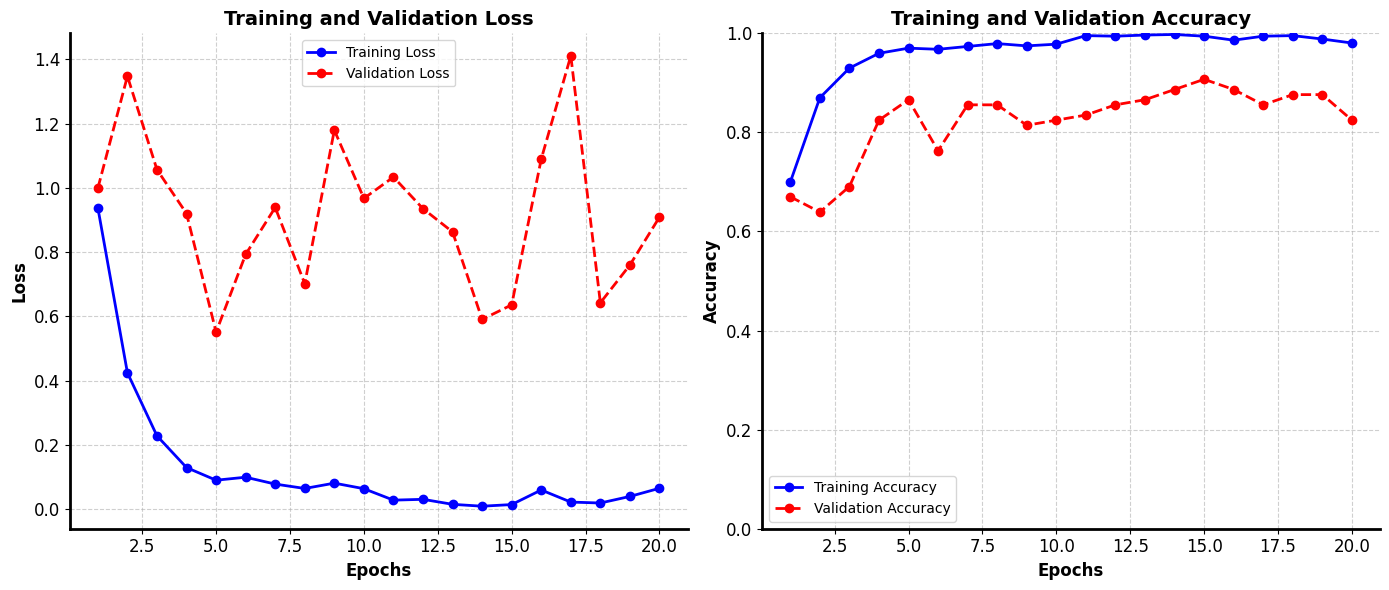

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
                          precision    recall  f1-score   support

            Dyskeratotic     0.8235    0.7368    0.7778        19
            Koilocytotic     0.6250    0.7143    0.6667        21
             Metaplastic     0.9286    0.8966    0.9123        29
               Parabasal     1.0000    0.9167    0.9565        12
Superficial-Intermediate     0.8235    0.8750    0.8485        16

                accuracy                         0.8247        97
               macro avg     0.8401    0.8279    0.8323        97
            weighted avg     0.8338    0.8247    0.8277        97




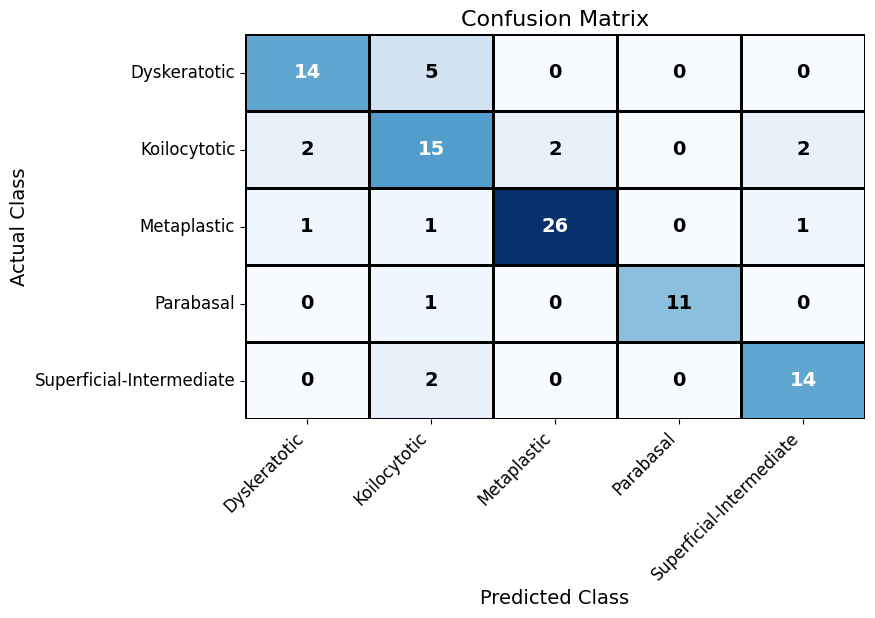

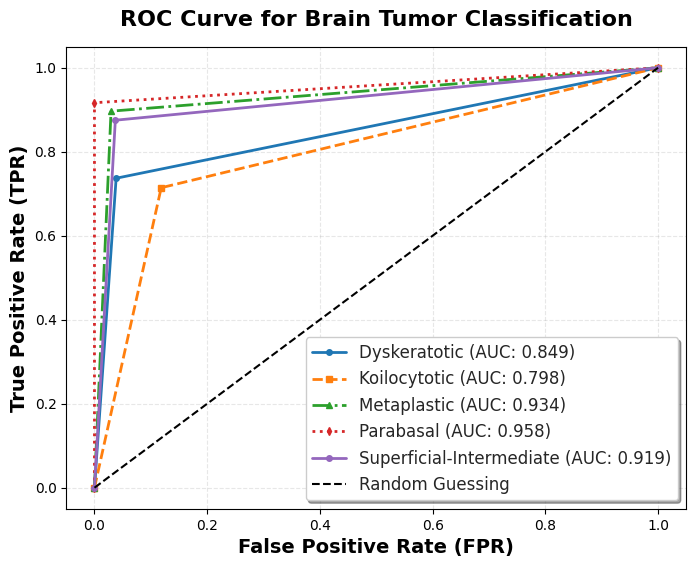

Overall ROC-AUC Score: 0.8916


In [23]:
run_op(novel_model,history, weight_path, 'ConvNext XT')

In [24]:
crdf 

,Model,Accuracy,Cohen's Kappa,Jaccard Similarity,Dyskeratotic_Precision,Dyskeratotic_Recall,Dyskeratotic_F1-Score,Koilocytotic_Precision,Koilocytotic_Recall,Koilocytotic_F1-Score,Metaplastic_Precision,Metaplastic_Recall,Metaplastic_F1-Score,Parabasal_Precision,Parabasal_Recall,Parabasal_F1-Score,Superficial-Intermediate_Precision,Superficial-Intermediate_Recall,Superficial-Intermediate_F1-Score
0,ConvNext XT,0.824742,0.776134,0.725716,0.823529,0.736842,0.777778,0.625,0.714286,0.666667,0.928571,0.896552,0.912281,1.0,0.916667,0.956522,0.823529,0.875,0.848485


# VGG

In [25]:
novel_model = create_novel_feature_extractor(input_shape=(w, h, c), final_class= final_class , 
                                             Backbone = tensorflow.keras.applications.VGG19)
history = novel_model.fit(X_train, y_train,  validation_data = (X_test, y_test), 
                                  epochs = 20, 
                                  callbacks = callbacks_list)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - categorical_accuracy: 0.5096 - loss: 1.3088
Epoch 1: val_categorical_accuracy did not improve from 0.90722
28/28 ━━━━━━━━━━━━━━━━━━━━ 57s 983ms/step - categorical_accuracy: 0.5142 - loss: 1.2991 - val_categorical_accuracy: 0.7629 - val_loss: 0.7350 - learning_rate: 0.0010
Epoch 2/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.8286 - loss: 0.5333
Epoch 2: val_categorical_accuracy did not improve from 0.90722
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - categorical_accuracy: 0.8290 - loss: 0.5317 - val_categorical_accuracy: 0.7835 - val_loss: 0.6957 - learning_rate: 0.0010
Epoch 3/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.8868 - loss: 0.3198
Epoch 3: val_categorical_accuracy did not improve from 0.90722
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - categorical_accuracy: 0.8877 - loss: 0.3172 - val_categorical_accuracy: 0.8351 - val_loss: 0.5765 - learning_rate: 0.0010
Epoch 4/20
27/28 ━━━━━━━━

Model and weights saved successfully.


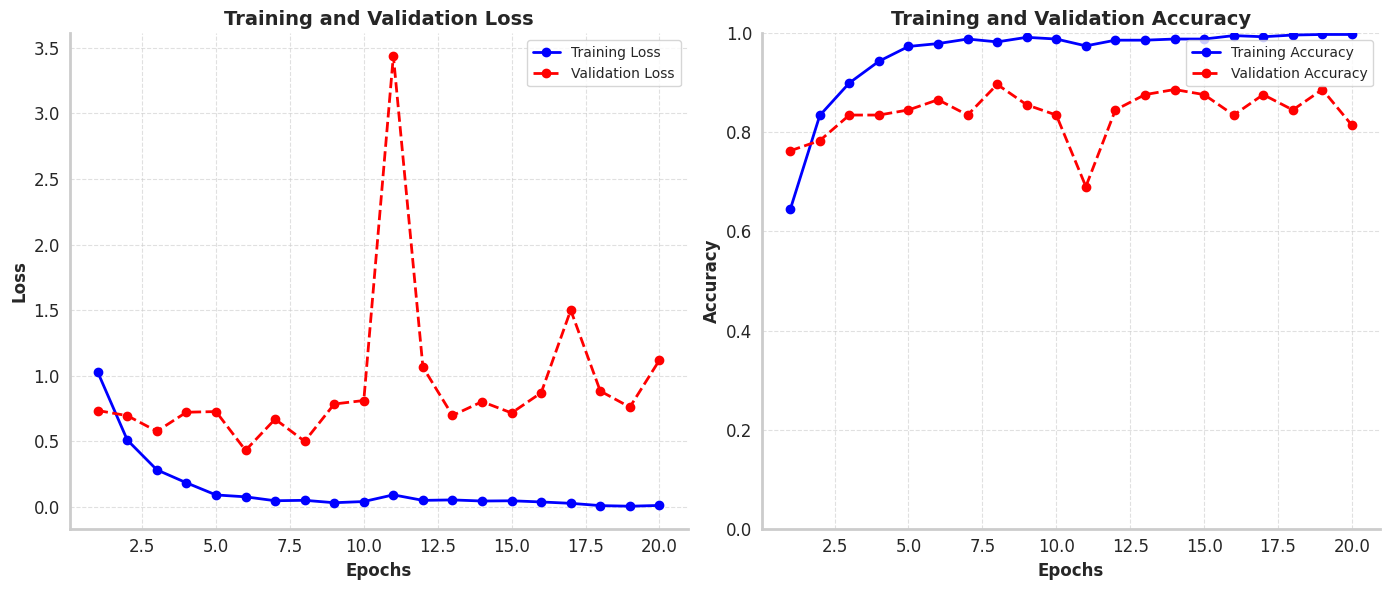

4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step
                          precision    recall  f1-score   support

            Dyskeratotic     0.6538    0.8947    0.7556        19
            Koilocytotic     0.7273    0.7619    0.7442        21
             Metaplastic     0.9565    0.7586    0.8462        29
               Parabasal     0.8462    0.9167    0.8800        12
Superficial-Intermediate     1.0000    0.8125    0.8966        16

                accuracy                         0.8144        97
               macro avg     0.8368    0.8289    0.8245        97
            weighted avg     0.8411    0.8144    0.8188        97




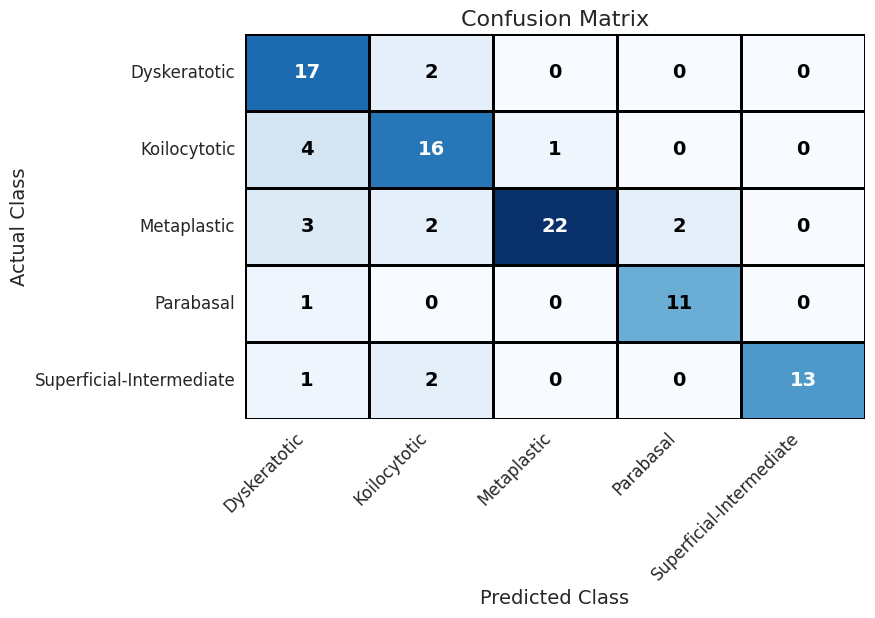

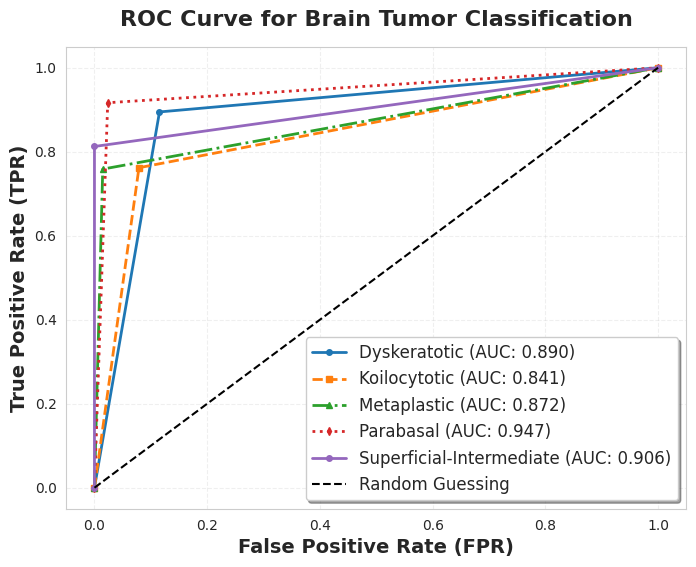

Overall ROC-AUC Score: 0.8912


In [26]:
run_op(novel_model,history, weight_path, 'VGG19')

In [27]:
crdf

,Model,Accuracy,Cohen's Kappa,Jaccard Similarity,Dyskeratotic_Precision,Dyskeratotic_Recall,Dyskeratotic_F1-Score,Koilocytotic_Precision,Koilocytotic_Recall,Koilocytotic_F1-Score,Metaplastic_Precision,Metaplastic_Recall,Metaplastic_F1-Score,Parabasal_Precision,Parabasal_Recall,Parabasal_F1-Score,Superficial-Intermediate_Precision,Superficial-Intermediate_Recall,Superficial-Intermediate_F1-Score
0,ConvNext XT,0.824742,0.776134,0.725716,0.823529,0.736842,0.777778,0.625000,0.714286,0.666667,0.928571,0.896552,0.912281,1.000000,0.916667,0.956522,0.823529,0.8750,0.848485
1,VGG19,0.814433,0.764753,0.706257,0.653846,0.894737,0.755556,0.727273,0.761905,0.744186,0.956522,0.758621,0.846154,0.846154,0.916667,0.880000,1.000000,0.8125,0.896552


# RESNET

In [28]:
novel_model = create_novel_feature_extractor(input_shape=(w, h, c), final_class= final_class , 
                                             Backbone = tensorflow.keras.applications.ResNet50)
history = novel_model.fit(X_train, y_train,  validation_data = (X_test, y_test), 
                                  epochs = 20, 
                                  callbacks = callbacks_list)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - categorical_accuracy: 0.5820 - loss: 1.2332
Epoch 1: val_categorical_accuracy did not improve from 0.90722
28/28 ━━━━━━━━━━━━━━━━━━━━ 57s 976ms/step - categorical_accuracy: 0.5857 - loss: 1.2246 - val_categorical_accuracy: 0.5052 - val_loss: 1.5131 - learning_rate: 0.0010
Epoch 2/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.8493 - loss: 0.4585
Epoch 2: val_categorical_accuracy did not improve from 0.90722
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - categorical_accuracy: 0.8491 - loss: 0.4577 - val_categorical_accuracy: 0.7320 - val_loss: 1.0716 - learning_rate: 0.0010
Epoch 3/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - categorical_accuracy: 0.9066 - loss: 0.2874
Epoch 3: val_categorical_accuracy did not improve from 0.90722
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - categorical_accuracy: 0.9069 - loss: 0.2855 - val_categorical_accuracy: 0.7938 - val_loss: 0.9695 - learning_rate: 0.0010
Epoch 4/20
27/28 ━━━━━━━━

Model and weights saved successfully.


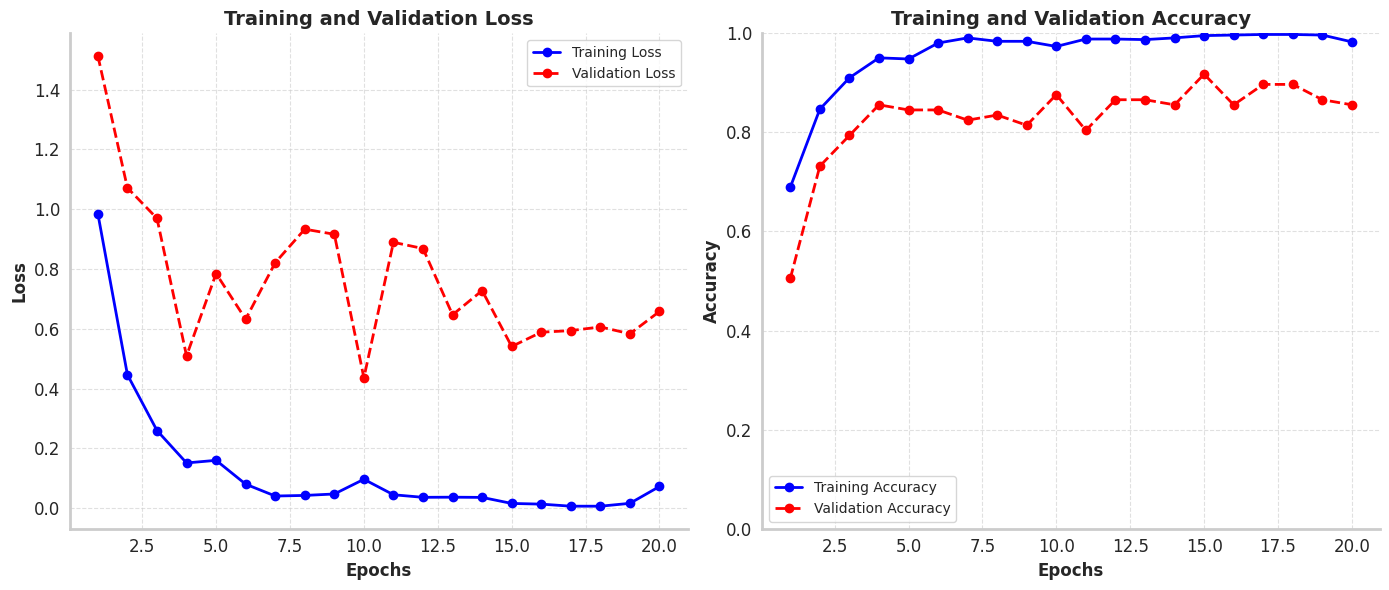

4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step
                          precision    recall  f1-score   support

            Dyskeratotic     0.9286    0.6842    0.7879        19
            Koilocytotic     0.8095    0.8095    0.8095        21
             Metaplastic     0.7632    1.0000    0.8657        29
               Parabasal     1.0000    0.9167    0.9565        12
Superficial-Intermediate     1.0000    0.8125    0.8966        16

                accuracy                         0.8557        97
               macro avg     0.9003    0.8446    0.8632        97
            weighted avg     0.8740    0.8557    0.8546        97




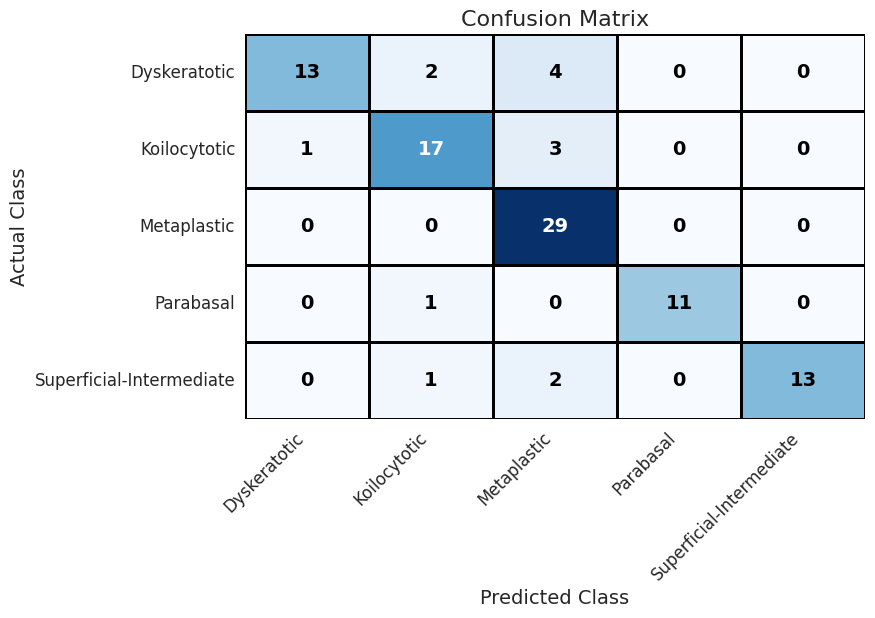

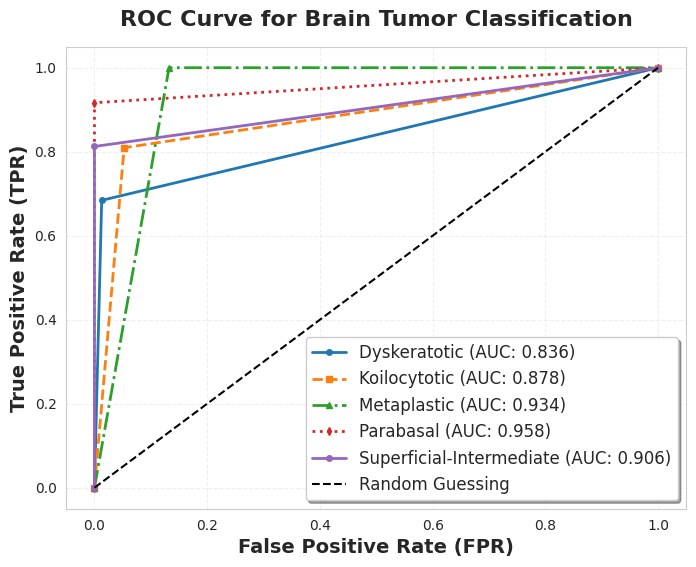

Overall ROC-AUC Score: 0.9025


In [29]:
run_op(novel_model,history, weight_path, 'ResNet')

In [30]:
crdf

,Model,Accuracy,Cohen's Kappa,Jaccard Similarity,Dyskeratotic_Precision,Dyskeratotic_Recall,Dyskeratotic_F1-Score,Koilocytotic_Precision,Koilocytotic_Recall,Koilocytotic_F1-Score,Metaplastic_Precision,Metaplastic_Recall,Metaplastic_F1-Score,Parabasal_Precision,Parabasal_Recall,Parabasal_F1-Score,Superficial-Intermediate_Precision,Superficial-Intermediate_Recall,Superficial-Intermediate_F1-Score
0,ConvNext XT,0.824742,0.776134,0.725716,0.823529,0.736842,0.777778,0.625000,0.714286,0.666667,0.928571,0.896552,0.912281,1.000000,0.916667,0.956522,0.823529,0.8750,0.848485
1,VGG19,0.814433,0.764753,0.706257,0.653846,0.894737,0.755556,0.727273,0.761905,0.744186,0.956522,0.758621,0.846154,0.846154,0.916667,0.880000,1.000000,0.8125,0.896552
2,ResNet,0.855670,0.812948,0.764465,0.928571,0.684211,0.787879,0.809524,0.809524,0.809524,0.763158,1.000000,0.865672,1.000000,0.916667,0.956522,1.000000,0.8125,0.896552


In [31]:
crdf1

""


# Inception

In [32]:
novel_model = create_novel_feature_extractor(input_shape=(w, h, c), final_class= final_class , 
                                             Backbone = tf.keras.applications.InceptionV3 )
history = novel_model.fit(X_train, y_train,  validation_data = (X_test, y_test), 
                                  epochs = 20, 
                                  callbacks = callbacks_list)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - categorical_accuracy: 0.5695 - loss: 1.2530
Epoch 1: val_categorical_accuracy did not improve from 0.91753
28/28 ━━━━━━━━━━━━━━━━━━━━ 57s 987ms/step - categorical_accuracy: 0.5733 - loss: 1.2430 - val_categorical_accuracy: 0.7113 - val_loss: 0.9304 - learning_rate: 0.0010
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.8845 - loss: 0.3778
Epoch 2: val_categorical_accuracy did not improve from 0.91753
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - categorical_accuracy: 0.8843 - loss: 0.3781 - val_categorical_accuracy: 0.8351 - val_loss: 0.5018 - learning_rate: 0.0010
Epoch 3/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.9345 - loss: 0.2191
Epoch 3: val_categorical_accuracy did not improve from 0.91753
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - categorical_accuracy: 0.9346 - loss: 0.2173 - val_categorical_accuracy: 0.7629 - val_loss: 0.7334 - learning_rate: 0.0010
Epoch 4/20
27/28 ━━━━━━━━

Model and weights saved successfully.


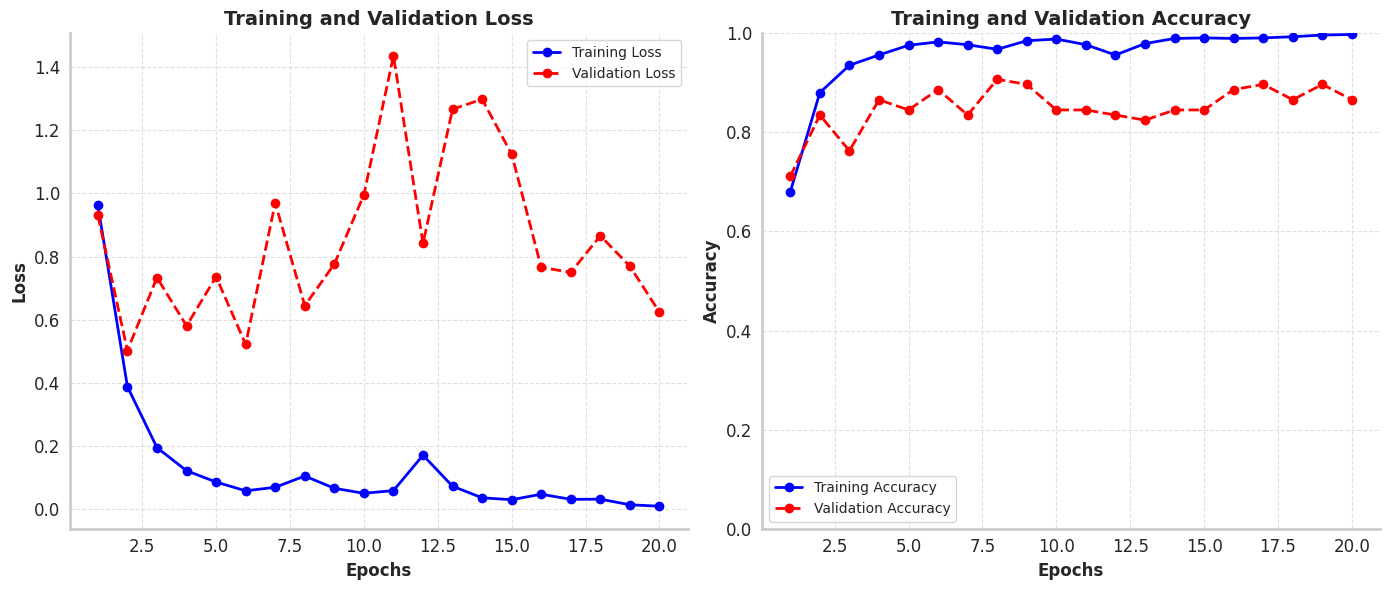

4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step
                          precision    recall  f1-score   support

            Dyskeratotic     0.8000    0.8421    0.8205        19
            Koilocytotic     0.7143    0.7143    0.7143        21
             Metaplastic     0.9310    0.9310    0.9310        29
               Parabasal     1.0000    1.0000    1.0000        12
Superficial-Intermediate     0.9333    0.8750    0.9032        16

                accuracy                         0.8660        97
               macro avg     0.8757    0.8725    0.8738        97
            weighted avg     0.8674    0.8660    0.8664        97




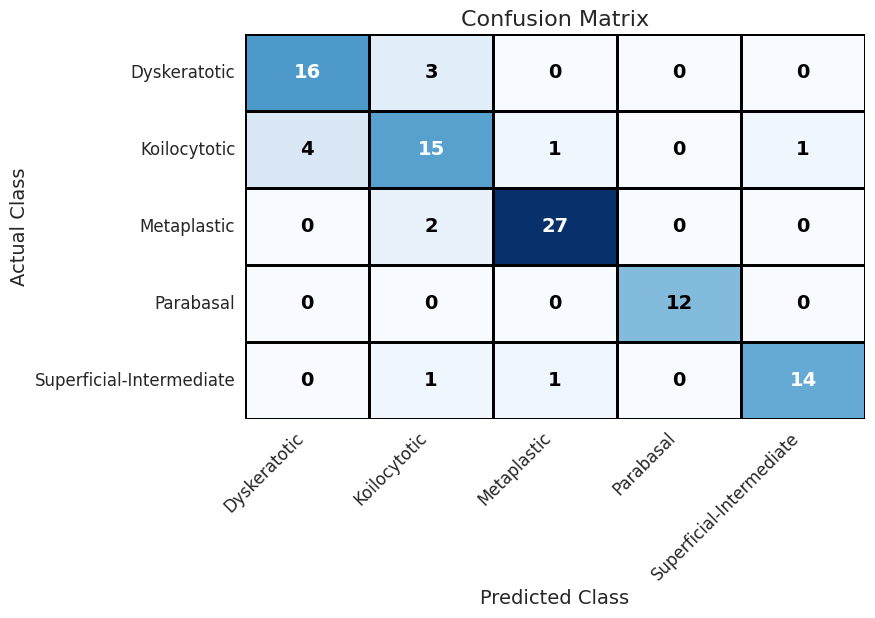

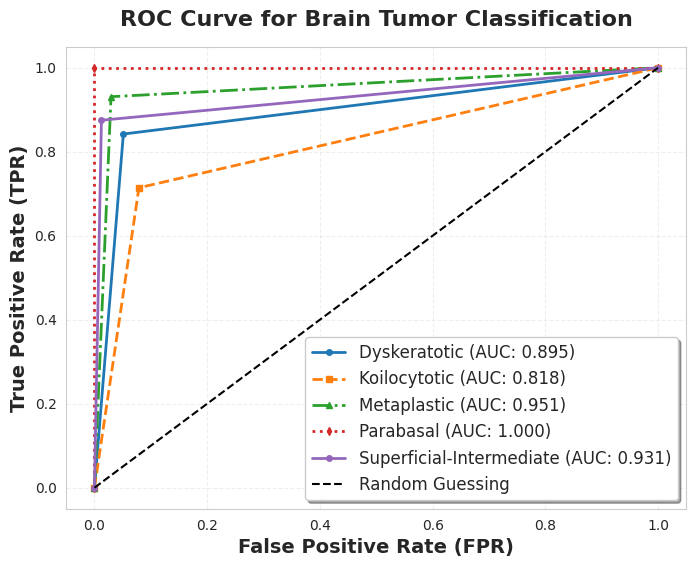

Overall ROC-AUC Score: 0.9190


In [33]:
run_op(novel_model,history, weight_path,'Inception')

In [34]:
crdf

,Model,Accuracy,Cohen's Kappa,Jaccard Similarity,Dyskeratotic_Precision,Dyskeratotic_Recall,Dyskeratotic_F1-Score,Koilocytotic_Precision,Koilocytotic_Recall,Koilocytotic_F1-Score,Metaplastic_Precision,Metaplastic_Recall,Metaplastic_F1-Score,Parabasal_Precision,Parabasal_Recall,Parabasal_F1-Score,Superficial-Intermediate_Precision,Superficial-Intermediate_Recall,Superficial-Intermediate_F1-Score
0,ConvNext XT,0.824742,0.776134,0.725716,0.823529,0.736842,0.777778,0.625000,0.714286,0.666667,0.928571,0.896552,0.912281,1.000000,0.916667,0.956522,0.823529,0.8750,0.848485
1,VGG19,0.814433,0.764753,0.706257,0.653846,0.894737,0.755556,0.727273,0.761905,0.744186,0.956522,0.758621,0.846154,0.846154,0.916667,0.880000,1.000000,0.8125,0.896552
2,ResNet,0.855670,0.812948,0.764465,0.928571,0.684211,0.787879,0.809524,0.809524,0.809524,0.763158,1.000000,0.865672,1.000000,0.916667,0.956522,1.000000,0.8125,0.896552
3,Inception,0.865979,0.828738,0.789141,0.800000,0.842105,0.820513,0.714286,0.714286,0.714286,0.931034,0.931034,0.931034,1.000000,1.000000,1.000000,0.933333,0.8750,0.903226


# mobilenet

In [35]:

novel_model = create_novel_feature_extractor(input_shape=(w, h, c), final_class= final_class , 
                                            Backbone =  tensorflow.keras.applications.MobileNetV2  )
history = novel_model.fit(X_train, y_train,  validation_data = (X_test, y_test), 
                                  epochs = 20, 
                                  callbacks = callbacks_list)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - categorical_accuracy: 0.5256 - loss: 1.2785
Epoch 1: val_categorical_accuracy did not improve from 0.91753
28/28 ━━━━━━━━━━━━━━━━━━━━ 56s 983ms/step - categorical_accuracy: 0.5301 - loss: 1.2687 - val_categorical_accuracy: 0.6289 - val_loss: 1.1814 - learning_rate: 0.0010
Epoch 2/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.8441 - loss: 0.4518
Epoch 2: val_categorical_accuracy did not improve from 0.91753
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - categorical_accuracy: 0.8447 - loss: 0.4504 - val_categorical_accuracy: 0.7526 - val_loss: 0.7872 - learning_rate: 0.0010
Epoch 3/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.9076 - loss: 0.2718
Epoch 3: val_categorical_accuracy did not improve from 0.91753
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - categorical_accuracy: 0.9069 - loss: 0.2729 - val_categorical_accuracy: 0.7629 - val_loss: 0.9894 - learning_rate: 0.0010
Epoch 4/20
27/28 ━━━━━━━━

Model and weights saved successfully.


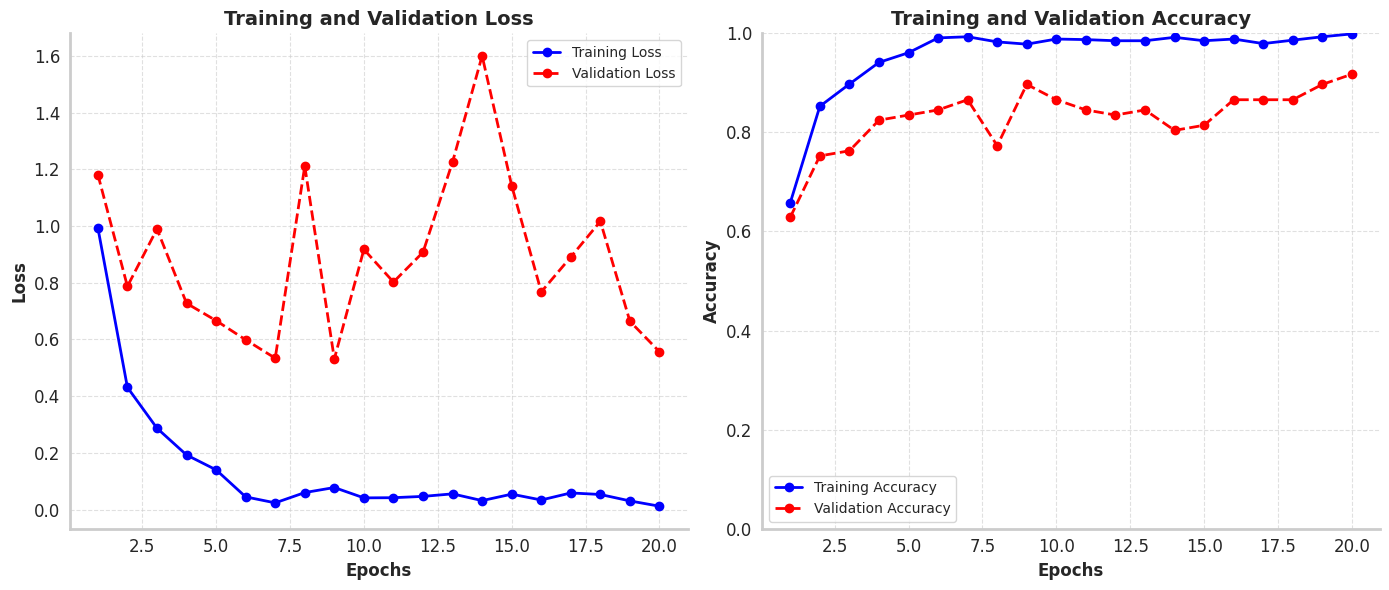

4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step
                          precision    recall  f1-score   support

            Dyskeratotic     0.8500    0.8947    0.8718        19
            Koilocytotic     0.8636    0.9048    0.8837        21
             Metaplastic     0.9655    0.9655    0.9655        29
               Parabasal     1.0000    1.0000    1.0000        12
Superficial-Intermediate     0.9286    0.8125    0.8667        16

                accuracy                         0.9175        97
               macro avg     0.9215    0.9155    0.9175        97
            weighted avg     0.9190    0.9175    0.9174        97




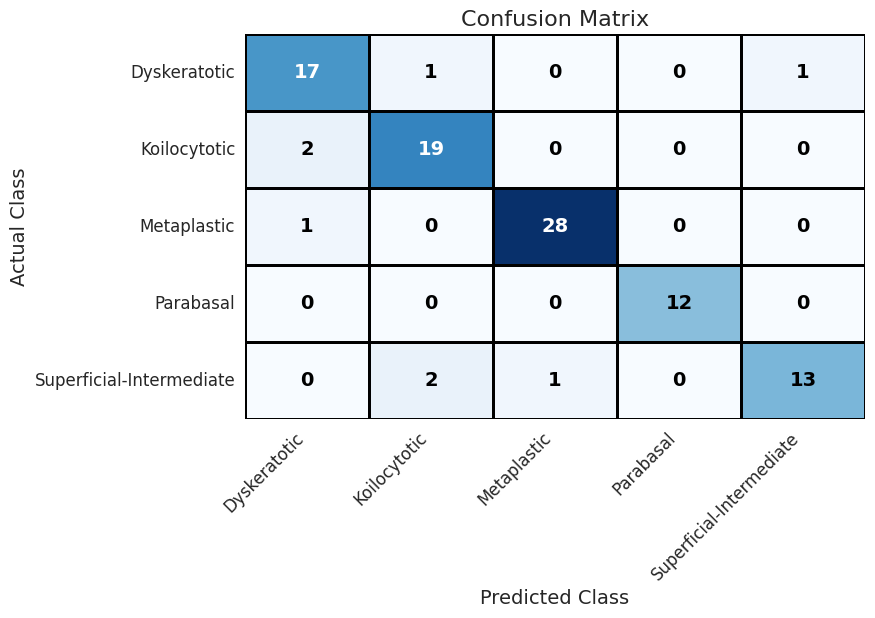

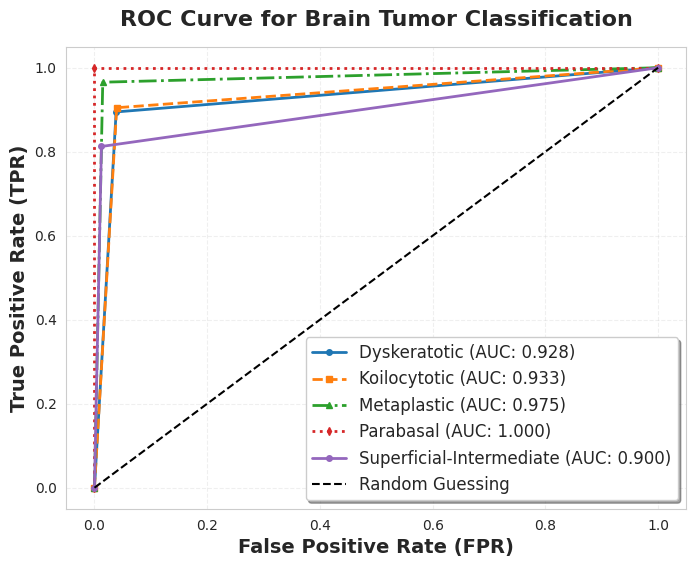

Overall ROC-AUC Score: 0.9473


In [36]:
run_op(novel_model,history, weight_path, 'MobileNet')

In [37]:
crdf

,Model,Accuracy,Cohen's Kappa,Jaccard Similarity,Dyskeratotic_Precision,Dyskeratotic_Recall,Dyskeratotic_F1-Score,Koilocytotic_Precision,Koilocytotic_Recall,Koilocytotic_F1-Score,Metaplastic_Precision,Metaplastic_Recall,Metaplastic_F1-Score,Parabasal_Precision,Parabasal_Recall,Parabasal_F1-Score,Superficial-Intermediate_Precision,Superficial-Intermediate_Recall,Superficial-Intermediate_F1-Score
0,ConvNext XT,0.824742,0.776134,0.725716,0.823529,0.736842,0.777778,0.625000,0.714286,0.666667,0.928571,0.896552,0.912281,1.000000,0.916667,0.956522,0.823529,0.8750,0.848485
1,VGG19,0.814433,0.764753,0.706257,0.653846,0.894737,0.755556,0.727273,0.761905,0.744186,0.956522,0.758621,0.846154,0.846154,0.916667,0.880000,1.000000,0.8125,0.896552
2,ResNet,0.855670,0.812948,0.764465,0.928571,0.684211,0.787879,0.809524,0.809524,0.809524,0.763158,1.000000,0.865672,1.000000,0.916667,0.956522,1.000000,0.8125,0.896552
3,Inception,0.865979,0.828738,0.789141,0.800000,0.842105,0.820513,0.714286,0.714286,0.714286,0.931034,0.931034,0.931034,1.000000,1.000000,1.000000,0.933333,0.8750,0.903226
4,MobileNet,0.917526,0.894537,0.852487,0.850000,0.894737,0.871795,0.863636,0.904762,0.883721,0.965517,0.965517,0.965517,1.000000,1.000000,1.000000,0.928571,0.8125,0.866667


# DenseNet121 

In [38]:

novel_model = create_novel_feature_extractor(input_shape=(w, h, c), final_class= final_class , 
                                            Backbone =  tensorflow.keras.applications.DenseNet121  )
history = novel_model.fit(X_train, y_train,  validation_data = (X_test, y_test), 
                                  epochs = 20, 
                                  callbacks = callbacks_list)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - categorical_accuracy: 0.5479 - loss: 1.2730
Epoch 1: val_categorical_accuracy did not improve from 0.91753
28/28 ━━━━━━━━━━━━━━━━━━━━ 56s 988ms/step - categorical_accuracy: 0.5521 - loss: 1.2642 - val_categorical_accuracy: 0.7216 - val_loss: 0.8512 - learning_rate: 0.0010
Epoch 2/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.8761 - loss: 0.4075
Epoch 2: val_categorical_accuracy did not improve from 0.91753
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - categorical_accuracy: 0.8757 - loss: 0.4070 - val_categorical_accuracy: 0.7216 - val_loss: 0.8465 - learning_rate: 0.0010
Epoch 3/20
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.9292 - loss: 0.2148
Epoch 3: val_categorical_accuracy did not improve from 0.91753
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - categorical_accuracy: 0.9290 - loss: 0.2144 - val_categorical_accuracy: 0.7835 - val_loss: 1.0083 - learning_rate: 0.0010
Epoch 4/20
27/28 ━━━━━━━━

Model and weights saved successfully.


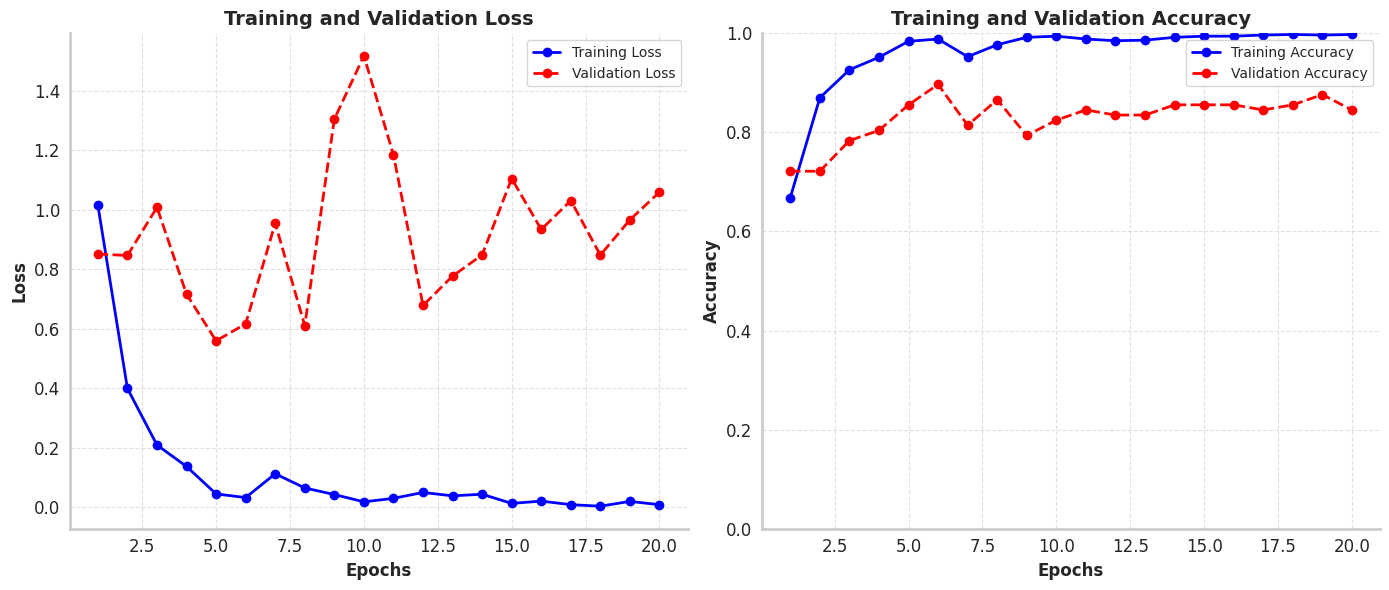

4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step
                          precision    recall  f1-score   support

            Dyskeratotic     0.8333    0.7895    0.8108        19
            Koilocytotic     0.6786    0.9048    0.7755        21
             Metaplastic     0.9231    0.8276    0.8727        29
               Parabasal     0.9167    0.9167    0.9167        12
Superficial-Intermediate     1.0000    0.8125    0.8966        16

                accuracy                         0.8454        97
               macro avg     0.8703    0.8502    0.8545        97
            weighted avg     0.8645    0.8454    0.8489        97




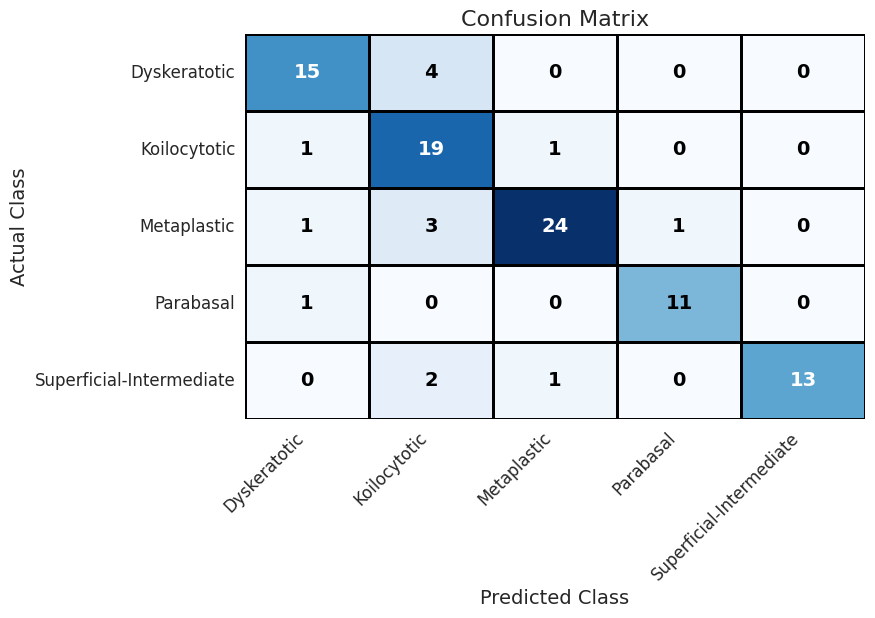

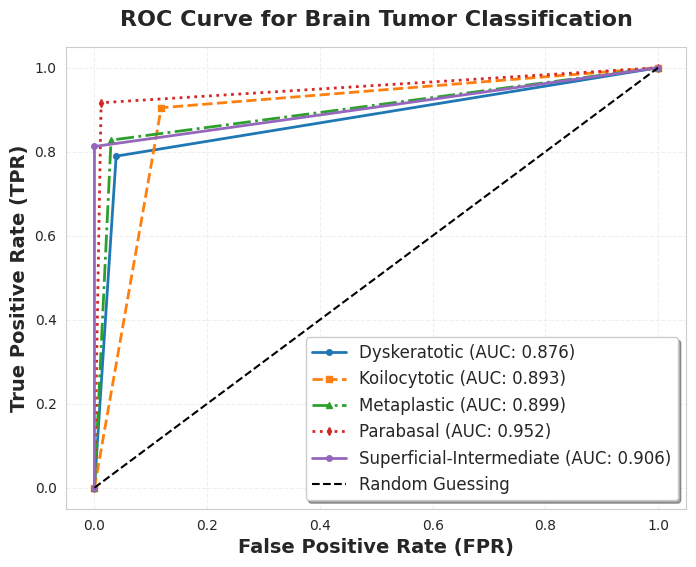

Overall ROC-AUC Score: 0.9053


In [39]:
run_op(novel_model,history, weight_path,'DenseNet')

In [40]:
crdf

,Model,Accuracy,Cohen's Kappa,Jaccard Similarity,Dyskeratotic_Precision,Dyskeratotic_Recall,Dyskeratotic_F1-Score,Koilocytotic_Precision,Koilocytotic_Recall,Koilocytotic_F1-Score,Metaplastic_Precision,Metaplastic_Recall,Metaplastic_F1-Score,Parabasal_Precision,Parabasal_Recall,Parabasal_F1-Score,Superficial-Intermediate_Precision,Superficial-Intermediate_Recall,Superficial-Intermediate_F1-Score
0,ConvNext XT,0.824742,0.776134,0.725716,0.823529,0.736842,0.777778,0.625000,0.714286,0.666667,0.928571,0.896552,0.912281,1.000000,0.916667,0.956522,0.823529,0.8750,0.848485
1,VGG19,0.814433,0.764753,0.706257,0.653846,0.894737,0.755556,0.727273,0.761905,0.744186,0.956522,0.758621,0.846154,0.846154,0.916667,0.880000,1.000000,0.8125,0.896552
2,ResNet,0.855670,0.812948,0.764465,0.928571,0.684211,0.787879,0.809524,0.809524,0.809524,0.763158,1.000000,0.865672,1.000000,0.916667,0.956522,1.000000,0.8125,0.896552
3,Inception,0.865979,0.828738,0.789141,0.800000,0.842105,0.820513,0.714286,0.714286,0.714286,0.931034,0.931034,0.931034,1.000000,1.000000,1.000000,0.933333,0.8750,0.903226
4,MobileNet,0.917526,0.894537,0.852487,0.850000,0.894737,0.871795,0.863636,0.904762,0.883721,0.965517,0.965517,0.965517,1.000000,1.000000,1.000000,0.928571,0.8125,0.866667
5,DenseNet,0.845361,0.802658,0.749600,0.833333,0.789474,0.810811,0.678571,0.904762,0.775510,0.923077,0.827586,0.872727,0.916667,0.916667,0.916667,1.000000,0.8125,0.896552
